# Project 2 - Ames Housing Data and Kaggle Challenge - Part 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
sns.set()

In [3]:
%store -r ames_train
%store -r ames_test

## Model Prep

In [4]:
features = [col for col in ames_train.columns if col != 'SalePrice']
X = ames_train[features]
y = ames_train['SalePrice']

In [5]:
X.shape

(2049, 139)

In [6]:
y.shape

(2049,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =42)

In [8]:
ss = StandardScaler()

In [9]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

## Instantiating Models

In [10]:
lr = LinearRegression()

In [11]:
ridge = RidgeCV(alphas=np.linspace(.1, 150, 100))

In [12]:
lasso = LassoCV(n_alphas=100)

## Cross Validating Models

### Linear Regression

In [13]:
lr_cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5)
lr_cv_scores.mean()

-1.9076596576053498e+23

<span style="color:blue">R_square for linear regression</span>

In [14]:
lr_cv_mse_scores = -cross_val_score(lr, X_train_scaled, y_train, scoring='neg_mean_squared_error',cv=5)
lr_cv_mse_scores.mean()

1.2159376072771593e+33

In [15]:
np.sqrt(lr_cv_mse_scores.mean())

3.487029691983077e+16

<span style="color:blue">RMSE for linear regression</span>

### Ridge

In [16]:
ridge_cv_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5)
ridge_cv_scores.mean()

0.8841989467025269

<span style="color:blue">R_square for Ridge</span>

In [17]:
ridge_cv_mse_scores = -cross_val_score(ridge, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
ridge_cv_mse_scores.mean()

717776591.4210232

In [18]:
np.sqrt(ridge_cv_mse_scores.mean())

26791.35292255737

<span style="color:blue">RMSE for Ridge</span>

### Lasso

In [19]:
lasso_cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv=5)
lasso_cv_scores.mean()

0.8880579459287693

<span style="color:blue">R_square for Lasso</span>

In [20]:
lasso_cv_mse_scores = -cross_val_score(lasso, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
lasso_cv_mse_scores.mean()

693452433.7810112

In [21]:
np.sqrt(lasso_cv_mse_scores.mean())

26333.48502916033

<span style="color:blue">RMSE for Lasso.<br>Lasso performs best among the 3 and is selected</span>

## Lasso Model Fitting and Evaluation

In [22]:
lasso.fit(X_train_scaled, y_train)

LassoCV()

In [23]:
lasso.alpha_

479.74406722856116

In [24]:
lasso.score(X_train_scaled, y_train)

0.9082450798104881

In [25]:
lasso.score(X_test_scaled, y_test)

0.9151937064369823

In [26]:
np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_scaled)))

23989.883695588833

In [27]:
np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_scaled)))

23155.023287943168

In [28]:
lasso.coef_

array([ 1.41377543e+03,  4.81870843e+03, -0.00000000e+00,  1.70544580e+04,
        4.85690419e+03,  5.19871997e+03,  6.12336472e+03,  8.03313891e+03,
       -8.35686014e+02,  7.85729427e+03,  2.07213834e+03,  2.59497335e+04,
        0.00000000e+00,  1.05223832e+03, -3.19694240e+03,  2.08694851e+03,
        4.56430840e+02,  4.96071151e+03,  1.05562121e+03,  1.16236839e+03,
       -1.05118341e+04, -2.67467374e+03, -4.42201817e+03,  0.00000000e+00,
       -2.91283571e+03, -5.83540564e+02, -1.59355032e+03,  1.27226598e+03,
        1.41640785e+03,  0.00000000e+00,  4.37117398e+02,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  6.86609427e+02, -1.98015754e+02,
        0.00000000e+00, -1.12119398e+03, -0.00000000e+00, -1.23874383e+02,
        1.16922587e+03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.91460364e+02, -6.51777800e+02,  2.12902532e+02, -5.70046426e+02,
       -1.36961631e+03,  0.00000000e+00,  7.69536101e+02,  0.00000000e+00,
        0.00000000e+00,  

<span style="color:blue">Coefficient of features</span>

In [29]:
feat_coeffs = pd.DataFrame({'Feature': [c for c in X_train.columns], 'Coefficient': lasso.coef_})

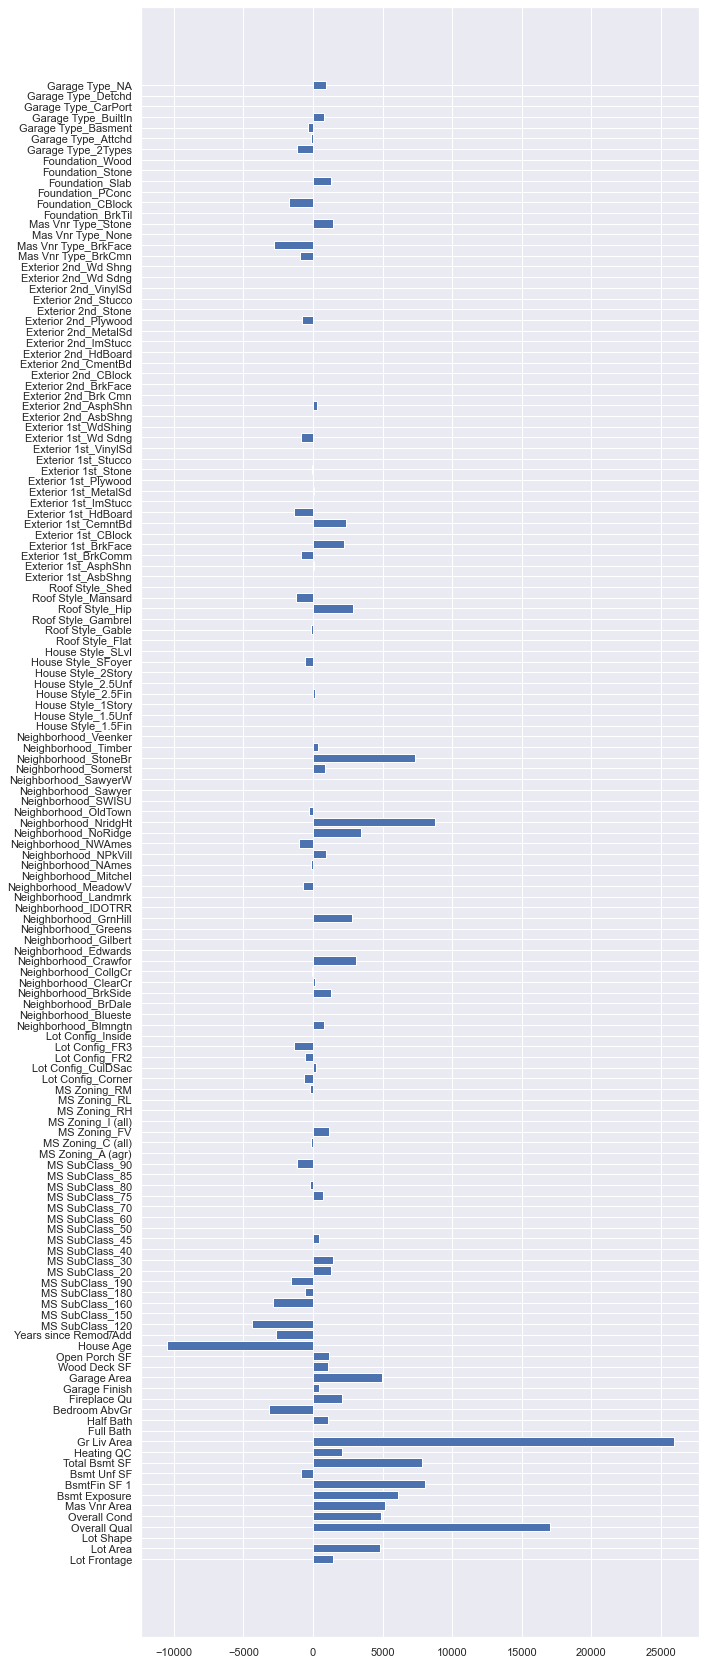

In [30]:
plt.figure(figsize=(10,30))
plt.barh(X_train.columns, lasso.coef_);

<span style="color:blue">Bar plot of coefficients. A significant number of features were reduced to 0. To proceed with feature trimming</span>

## 2nd Lasso Model

In [31]:
fifth_keep_cols = feat_coeffs['Feature'].loc[feat_coeffs['Coefficient']!=0]

In [32]:
X2_train = X_train[fifth_keep_cols]
X2_test = X_test[fifth_keep_cols]

In [33]:
ss2 = StandardScaler()
lasso2 = LassoCV(n_alphas=100)

In [34]:
X2_train_scaled = ss2.fit_transform(X2_train)
X2_test_scaled = ss2.transform(X2_test)

In [35]:
lasso2_cv_scores = cross_val_score(lasso2, X2_train_scaled, y_train, cv=5)
lasso2_cv_scores.mean()

0.8919672296897805

In [36]:
lasso2_cv_mse_scores = -cross_val_score(lasso2, X2_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
lasso2_cv_mse_scores.mean()

669399484.9621973

In [37]:
np.sqrt(lasso2_cv_mse_scores.mean())

25872.75565072645

In [38]:
lasso2.fit(X2_train_scaled, y_train)

LassoCV()

In [39]:
lasso2.score(X2_train_scaled, y_train)

0.9109384356602959

In [40]:
lasso2.score(X2_test_scaled, y_test)

0.9162010085127759

In [41]:
np.sqrt(mean_squared_error(y_train, lasso2.predict(X2_train_scaled)))

23635.16405491846

In [42]:
np.sqrt(mean_squared_error(y_test, lasso2.predict(X2_test_scaled)))

23017.098521397224

<span style="color:blue">lasso2 has higher r2 values and lower RMSE as compared to the first lasso model</span>

In [43]:
lasso2.coef_

array([ 1.63085445e+03,  4.76981468e+03,  1.64150511e+04,  5.56115592e+03,
        5.68856279e+03,  6.38290991e+03,  6.05025645e+03, -3.13355933e+03,
        9.99654673e+03,  1.96271031e+03,  2.57756213e+04,  1.36015471e+03,
       -3.52064356e+03,  1.85864617e+03,  1.06916255e+03,  5.25787440e+03,
        1.05552479e+03,  1.24067893e+03, -1.19034686e+04, -2.46572576e+03,
       -5.70620566e+03, -3.97558356e+03, -1.05019107e+03, -1.96960046e+03,
        1.06508171e+03,  1.70385804e+03,  7.32490893e+02,  1.17721989e+03,
       -6.28145712e+02, -1.61954998e+03, -4.87367097e+02,  1.55020095e+03,
       -1.09046786e+01, -9.75070030e+02,  4.84095750e+02, -8.50383801e+02,
       -1.72356432e+03,  1.56949980e+03,  1.34513502e+03,  3.72532523e+02,
       -5.28299805e+02,  3.54864249e+03, -3.75749157e+02,  3.24056808e+03,
       -8.59471386e+02, -4.12526076e+02,  1.77424650e+03, -1.22990964e+03,
        3.62210070e+03,  9.17407613e+03, -7.06061796e+02,  9.85106601e+02,
        7.75483368e+03,  

In [44]:
feat_coeffs2 = pd.DataFrame({'Feature': [c for c in X2_train.columns], 'Coefficient': lasso2.coef_})

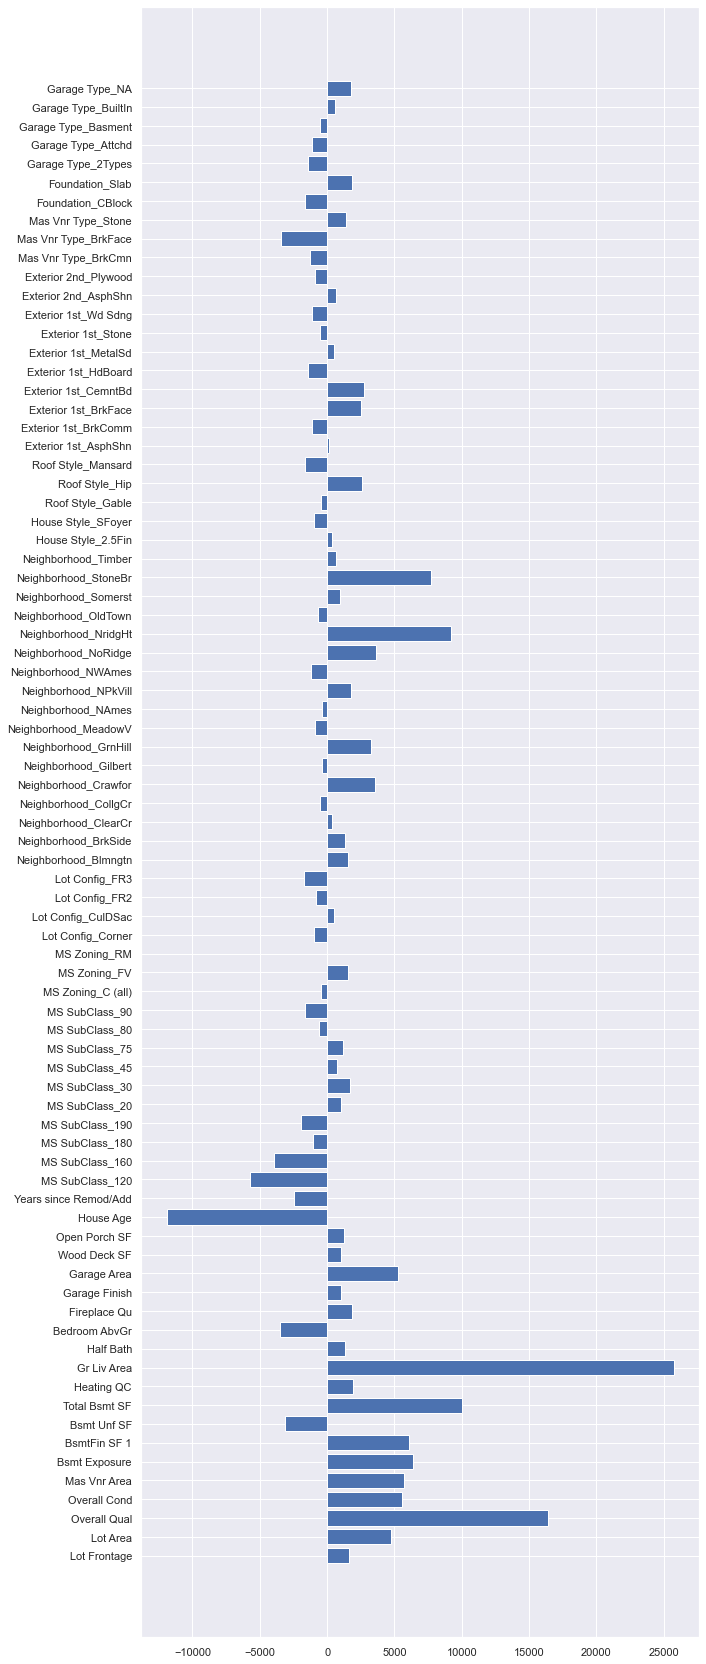

In [45]:
plt.figure(figsize=(10,30))
plt.barh(X2_train.columns, lasso2.coef_);

<span style="color:blue">No additional features were reduced to coefficient = 0</span>

## Elastic Net Model

In [46]:
en_alphas = np.arange(.001,1,.005)
en = ElasticNetCV(l1_ratio=0.5, alphas=en_alphas, cv=5, max_iter = 10000)

In [47]:
en_cv_scores = cross_val_score(en, X2_train_scaled, y_train, cv=5)
en_cv_scores.mean()

0.8920710479059757

In [48]:
en_cv_mse_scores = -cross_val_score(en, X2_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
en_cv_mse_scores.mean()

669487347.0922544

In [49]:
np.sqrt(en_cv_mse_scores.mean())

25874.453561230126

In [50]:
en.fit(X2_train_scaled, y_train);

In [51]:
en.score(X2_train_scaled, y_train)

0.910467648676329

In [52]:
en.score(X2_test_scaled, y_test)

0.9143405241170013

In [53]:
np.sqrt(mean_squared_error(y_train, lasso2.predict(X2_train_scaled)))

23635.16405491846

In [54]:
np.sqrt(mean_squared_error(y_test, lasso2.predict(X2_test_scaled)))

23017.098521397224

<span style="color:blue">Elastic Net gives a better score for the test RMSE but performs poorer for train RMSE as compared to lasso2. R2 scores were close but lasso2 had better performance</span>

In [55]:
en.coef_

array([  2346.06530293,   4808.24848186,  15541.11950761,   5182.9354251 ,
         5856.05370347,   6476.08272119,   6499.02985167,  -2630.08310444,
        10277.37098259,   2182.76384689,  22061.30851311,   2151.61114818,
        -2492.28558483,   2523.22737814,   1578.92863429,   6024.93791805,
         1408.23334113,   1664.72947736, -10007.1875833 ,  -3112.77516007,
        -5537.34886871,  -3734.76672262,   -938.73965314,  -2229.82654098,
          534.08401743,   1133.39118216,    748.91315241,   1480.31772706,
         -974.92800815,  -1557.52800011,   -817.54650788,   1622.58423677,
         -189.4642638 ,  -1177.58490152,    797.27946463,  -1086.40797303,
        -1856.6391125 ,   1575.55255781,   1305.64680139,    491.11624533,
         -823.06960857,   3522.67474918,   -736.72919686,   3297.51768725,
        -1296.13895423,   -992.68959785,   1877.51097045,  -1250.78155269,
         3912.52975849,   8742.08449872,  -1080.53177225,    926.07375545,
         7723.97610677,  

<span style="color:blue">As with lasso2, no additional features were reduced to coefficient = 0</span>

## 2nd Ridge Model

In [56]:
ridge2 = RidgeCV(alphas=np.linspace(.1, 150, 100))

In [57]:
ridge2_cv_scores = cross_val_score(ridge2, X2_train_scaled, y_train, cv=5)
ridge2_cv_scores.mean()

0.8922595054319327

In [58]:
ridge2_cv_mse_scores = -cross_val_score(ridge2, X2_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
ridge2_cv_mse_scores.mean()

667928503.4504222

In [59]:
np.sqrt(ridge2_cv_mse_scores.mean())

25844.312787350762

In [60]:
ridge2.fit(X2_train_scaled, y_train);

In [61]:
ridge2.score(X2_train_scaled, y_train)

0.9107481105540288

In [62]:
ridge2.score(X2_test_scaled, y_test)

0.9147059333410731

In [63]:
np.sqrt(mean_squared_error(y_train, ridge2.predict(X2_train_scaled)))

23660.40482207637

In [64]:
np.sqrt(mean_squared_error(y_test, ridge2.predict(X2_test_scaled)))

23221.517195430642

<span style="color:blue">lasso2 gives a better performance as compared ridge2</span>

In [65]:
ridge2.coef_

array([  2241.12010783,   4795.82536142,  15665.97243653,   5319.30836001,
         5877.06391969,   6487.70264067,   6296.68719361,  -2884.66970138,
        10392.51970917,   2130.86475081,  22698.18784768,   2045.07460503,
        -2708.03570997,   2373.54711575,   1540.8509869 ,   5930.3851459 ,
         1344.9651693 ,   1596.66592606, -10452.87426983,  -2982.07272408,
        -5707.60102011,  -3881.177595  ,  -1000.24671676,  -2227.4622497 ,
          601.23978978,   1261.6483624 ,    773.10833921,   1472.89647173,
         -956.29575138,  -1621.48420427,   -795.42187667,   1654.37521224,
         -135.54882227,  -1176.47485468,    766.54734419,  -1072.71359636,
        -1871.68005639,   1660.16596556,   1321.74488247,    492.92688219,
         -810.62526453,   3576.71367708,   -702.35259413,   3333.63211908,
        -1235.68327152,   -912.25745785,   1946.15929956,  -1270.21939966,
         3883.67398834,   8866.76294563,  -1060.12441693,    942.78719836,
         7782.01589275,  

## Final Feature Selection

In [66]:
feat_coeffs3 = pd.DataFrame({'Feature': [c for c in X2_train.columns], 'Coefficient': en.coef_})

In [67]:
feat_coeffs4 = pd.DataFrame({'Feature': [c for c in X2_train.columns], 'Coefficient': ridge2.coef_})

In [68]:
top_30_lasso2 = feat_coeffs2.sort_values(by=['Coefficient'], ascending=False).head(30)

In [69]:
top_30_en = feat_coeffs3.sort_values(by=['Coefficient'], ascending=False).head(30)

In [70]:
top_30_ridge2 = feat_coeffs4.sort_values(by=['Coefficient'], ascending=False).head(30)

In [71]:
set(top_30_lasso2).difference(set(top_30_en))

set()

In [72]:
set(top_30_lasso2).difference(set(top_30_ridge2))

set()

In [73]:
selected_features = top_30_lasso2['Feature']

<span style="color:blue">To improve interpretability of the model, 30 features are to be selected. All 3 models have the same top 30 coefficients although there are some slight differences in order. As such, these 30 features are selected for the final model. Since lasso2 had the best performance, the final model will be built using lasso</span>

## Final Model

In [74]:
X_fin_train = X[selected_features]
X_fin_test = ames_test[selected_features]

In [75]:
ss3 = StandardScaler()
lasso_fin = LassoCV(n_alphas=100)

In [76]:
X_fin_train_scaled = ss3.fit_transform(X_fin_train)
X_fin_test_scaled = ss3.transform(X_fin_test)

In [77]:
lasso_fin_cv_scores = cross_val_score(lasso_fin, X_fin_train_scaled, y, cv=5)
lasso_fin_cv_scores.mean()

0.8831580372682044

In [78]:
lasso_fin_cv_mse_scores = -cross_val_score(lasso_fin, X_fin_train_scaled, y, scoring='neg_mean_squared_error', cv=5)
lasso_fin_cv_mse_scores.mean()

734016095.1156479

In [79]:
np.sqrt(lasso_fin_cv_mse_scores.mean())

27092.7314074393

In [80]:
lasso_fin.fit(X_fin_train_scaled, y)

LassoCV()

In [81]:
np.sqrt(mean_squared_error(y, lasso_fin.predict(X_fin_train_scaled)))

26348.840355570206

<span style="color:blue">After reducing to 30 features, the final model has RMSE of 26209. This represents an increase in RMSE by 3192 when compared to the RMSE of the test data from the best performing lasso2 model that had 79 features.<br><br>
In percentage terms, a 62% reduction in the number of features, thus increasing interpretability, only caused a 14% increase in RMSE which represents a fair trade-of</span>

In [83]:
lasso_fin.predict(X_fin_test_scaled)

array([171538.97808075, 164968.05451369, 198907.02926592, 104409.75281881,
       184337.20094085,  86174.4182549 ,  79072.89037667, 139657.93101133,
       191462.6903218 , 155977.1466348 , 140157.58014543, 130524.05845476,
       167409.2007173 , 279794.51715736, 157555.74647637, 105494.91426874,
       167271.04303213, 111388.42086357, 188291.35460768, 231557.29106659,
       136523.36736792, 140914.35802926, 176554.94946652, 187451.6320635 ,
       181046.09558831, 116508.98680447, 117458.92155214, 113228.29036908,
       176938.66327888,  29915.39234442,  93025.06107819,  94243.62595176,
       241935.26164168, 157588.19238874, 203252.58825033, 167023.55447314,
       112771.73513127,  89588.83889369,  99338.98080115, 207085.62576265,
       176642.96267729, 185269.3791399 , 140113.98266786, 161481.67637916,
       219168.77206492,  90142.51359369, 215948.60413427, 106177.49663992,
       113782.47411754, 114187.63538356, 107452.68102663, 215672.51031156,
       248009.51683886, 1

## Preparing Kaggle Submission

In [84]:
ames_test_fin = pd.read_csv('datasets/test.csv')

In [85]:
ames_test_fin['SalePrice']=lasso_fin.predict(X_fin_test_scaled)

In [86]:
Submission = ames_test_fin[['Id', 'SalePrice']]

In [87]:
Submission.head()

,Id,SalePrice
0,2658,171538.978081
1,2718,164968.054514
2,2414,198907.029266
3,1989,104409.752819
4,625,184337.200941


In [88]:
Submission.to_csv('datasets/Submission.csv', index=False)

## Conclusion and Recommendations

- Which features appear to add the most value to a home?

In [90]:
lasso_fin_coefficients = pd.DataFrame({'Feature': [c for c in X_fin_train.columns], 'Coefficient': lasso_fin.coef_})

In [91]:
top_30_lasso_fin = lasso_fin_coefficients.sort_values(by=['Coefficient'], ascending=False).head(30)
top_30_lasso_fin

,Feature,Coefficient
1,Overall Qual,21716.137318
0,Gr Liv Area,20050.674041
2,Total Bsmt SF,10228.896571
6,BsmtFin SF 1,9482.413006
3,Neighborhood_NridgHt,8822.085283
9,Garage Area,8630.896521
4,Neighborhood_StoneBr,7436.625072
17,Heating QC,6869.135978
5,Bsmt Exposure,6582.291254
10,Lot Area,5549.645991


- Which features hurt the value of a home the most?

The coefficients for the final 30 features selected were all positive. Nonetheless, referring to the lasso2 model created earlier, it is observed that some features had negative coefficients when influencing the price of the house, such as, the age of the house, belonging to MS SubClass 120 or 160 which are 1 or 2 -STORY PUD (Planned Unit Developments) that are 1946 & NEWER etc.

- What are things that homeowners could improve in their homes to increase the value?

The top coefficient is the Overall Quality of the house which is rated by the overall material and finish. 

The second would be the Above grade (ground) living area square feet.

It would be difficult to change the material of the house entirely but appropriate renovation/maintenance would help to maintain the condition of the material and finish thus boosting the value of their homes.

Home-owners could also undertake expansion/modification projects to increase the size of their living areas to increase their house value. Even keeping the house neat and clutter free would serve to make the livable areas appear more spacious.

- What neighborhoods seem like they might be a good investment?

A few of the top 30 coefficients were some of the neighborhoods, with the top 3 being Northridge Heights, Stone Brook and Northridge.

- Do you feel that this model will generalize to other cities? 
- How could you revise your model to make it more universal OR what data would you need from another city to make a comparable model?

Whether this generalizes to other cities depends on the city/country in question. Different cities vary in terms of population, economic function and infrastructure to name a few examples. Depending on these, the population density, number of houses, type of houses will all vary accordingly.

This dataset would be almost useless if we were to use it for a city like Singapore since the majority of population live in HDB flats with no garages, basements, etc.

Nonetheless, features such as size, quality, condition and the neighborhood the house is located in can be applied to any house world-wide. To make a comparable model, we can start with these features and their corresponding price/valuations before going on further to identify the other additional factors.